# Descriptive And Inferential Statistics

## Introduction to Basic Statistics

#### Import Libaries

In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import yfinance as yf
from datetime import date
import matplotlib.pyplot as plt


#### Extract Data

In [5]:
stockTickers = list(pd.read_csv('https://archives.nseindia.com/content/indices/top10nifty50_200625.csv')['SYMBOL']+'.NS')
print(stockTickers)

['HDFCBANK.NS', 'ICICIBANK.NS', 'RELIANCE.NS', 'INFY.NS', 'BHARTIARTL.NS', 'LT.NS', 'ITC.NS', 'TCS.NS', 'AXISBANK.NS', 'KOTAKBANK.NS']


In [6]:
spotData = yf.download(tickers=stockTickers, start=date(2021,1,1), end=date(2025,1,1), auto_adjust=False, multi_level_index=False)['Adj Close']
indexData = yf.download(tickers='^NSEI', start=date(2021,1,1), end=date(2025,1,1), auto_adjust=False, multi_level_index=False)['Adj Close']
spotReturns, indexReturns = spotData.pct_change().iloc[1:], indexData.pct_change().iloc[1:]

[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  1 of 1 completed


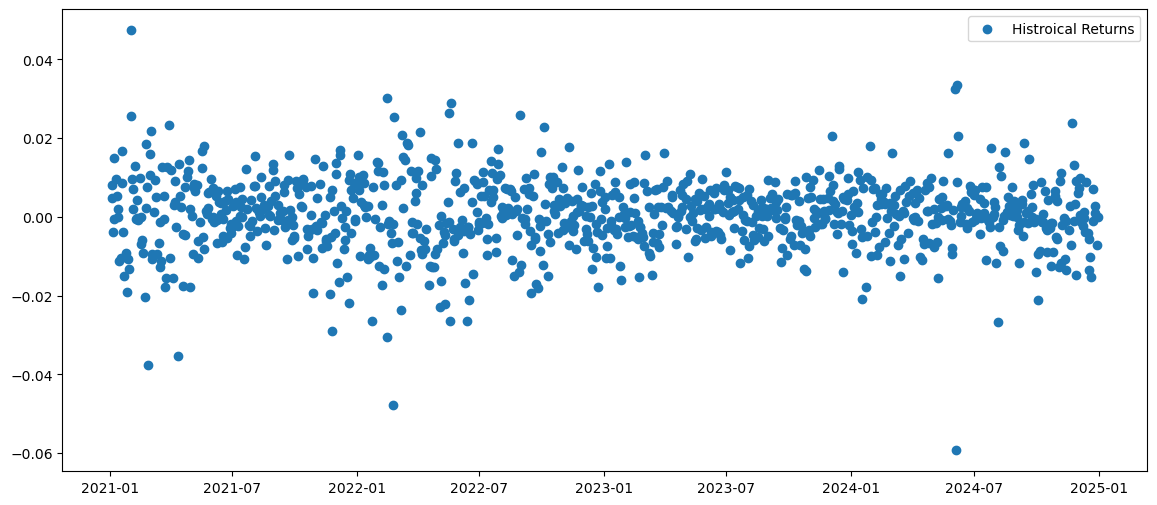

In [7]:
plt.figure(figsize=(14,6))
plt.scatter(x = indexReturns.index, y = indexReturns.values , label = 'Histroical Returns')
plt.legend()
plt.show()

## Bivaritave Analysis

    (Statistical analysis performed between two variables)

### 1. Covariance

In [10]:
stockReturns = spotReturns['HDFCBANK.NS']

In [31]:
print(sum((Xret-(sum(stockReturns)/len(stockReturns)))*(Yret-(sum(indexReturns)/len(indexReturns)))
    for Xret, Yret in zip(stockReturns, indexReturns))/(len(indexReturns)-1))

9.003240735829366e-05


In [12]:
spotReturns['NIFTY50'] = indexReturns

In [13]:
spotReturns.cov()

Ticker,AXISBANK.NS,BHARTIARTL.NS,HDFCBANK.NS,ICICIBANK.NS,INFY.NS,ITC.NS,KOTAKBANK.NS,LT.NS,RELIANCE.NS,TCS.NS,NIFTY50
Ticker,,,,,,,,,,,
AXISBANK.NS,0.000269,0.000069,0.000101,0.000156,0.000044,0.000055,0.000097,0.000098,0.000090,0.000041,0.000092
BHARTIARTL.NS,0.000069,0.000215,0.000060,0.000073,0.000056,0.000048,0.000063,0.000075,0.000067,0.000046,0.000068
HDFCBANK.NS,0.000101,0.000060,0.000200,0.000110,0.000056,0.000040,0.000108,0.000088,0.000074,0.000045,0.000090
ICICIBANK.NS,0.000156,0.000073,0.000110,0.000216,0.000059,0.000056,0.000109,0.000101,0.000081,0.000044,0.000093
INFY.NS,0.000044,0.000056,0.000056,0.000059,0.000225,0.000039,0.000044,0.000077,0.000062,0.000137,0.000076
ITC.NS,0.000055,0.000048,0.000040,0.000056,0.000039,0.000174,0.000058,0.000057,0.000060,0.000029,0.000056
KOTAKBANK.NS,0.000097,0.000063,0.000108,0.000109,0.000044,0.000058,0.000217,0.000076,0.000076,0.000035,0.000081
LT.NS,0.000098,0.000075,0.000088,0.000101,0.000077,0.000057,0.000076,0.000242,0.000095,0.000066,0.000094
RELIANCE.NS,0.000090,0.000067,0.000074,0.000081,0.000062,0.000060,0.000076,0.000095,0.000219,0.000056,0.000093


In [14]:
spotReturns.cov().loc['HDFCBANK.NS','NIFTY50']

9.003240735829364e-05

In [15]:
print(np.cov(stockReturns,indexReturns)[0,1])

9.003240735829368e-05


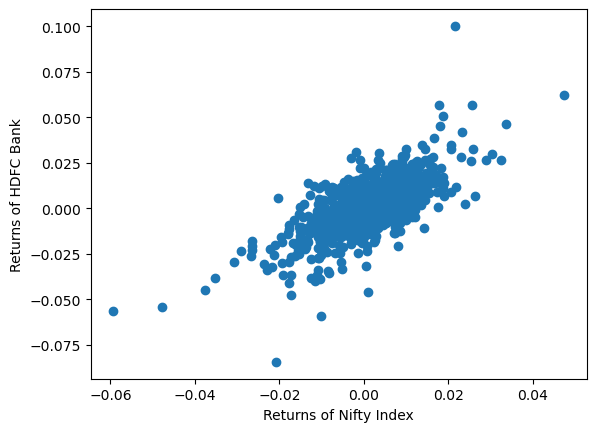

In [16]:
plt.scatter(x=indexReturns,y=stockReturns)
plt.xlabel('Returns of Nifty Index')
plt.ylabel('Returns of HDFC Bank')
plt.show()

### 2. Correlation Coefficent

In [58]:
sum((Xret-(sum(stockReturns)/len(stockReturns)))*(Yret-(sum(indexReturns)/len(indexReturns))) for Xret, Yret in zip(stockReturns, indexReturns))/(len(indexReturns)-1) /  ((sum((Xret - (sum((stockReturns)/len(stockReturns)))**2 for Xret in stockReturns) /(len(stockReturns)-1))**0.5 * (sum((Yret - (sum(indexReturns)/len(indexReturns)))**2 for Yret in indexReturns) /(len(indexReturns)-1))**0.5))

TypeError: unsupported operand type(s) for /: 'generator' and 'int'

In [ ]:
print(sum((Xret - (sum(stockReturns) / len(stockReturns))) * (Yret - (sum(indexReturns) / len(indexReturns))) 
          for Xret, Yret in zip(stockReturns, indexReturns)) / (len(indexReturns) - 1) / 
      ((sum((Xret - (sum(stockReturns) / len(stockReturns)))*2 for Xret in stockReturns) / (len(stockReturns) - 1))*0.5 * 
       (sum((Yret - (sum(indexReturns) / len(indexReturns)))*2 for Yret in indexReturns) / (len(indexReturns) - 1))*0.5))

In [41]:
spotReturns.corr()

Ticker,AXISBANK.NS,BHARTIARTL.NS,HDFCBANK.NS,ICICIBANK.NS,INFY.NS,ITC.NS,KOTAKBANK.NS,LT.NS,RELIANCE.NS,TCS.NS,NIFTY50
Ticker,,,,,,,,,,,
AXISBANK.NS,1.000000,0.285579,0.433227,0.646591,0.180150,0.253872,0.402233,0.384406,0.372421,0.188179,0.617306
BHARTIARTL.NS,0.285579,1.000000,0.290450,0.340739,0.255992,0.246624,0.290758,0.326571,0.310440,0.238172,0.507817
HDFCBANK.NS,0.433227,0.290450,1.000000,0.527470,0.264737,0.216288,0.518395,0.399249,0.354347,0.238450,0.697488
ICICIBANK.NS,0.646591,0.340739,0.527470,1.000000,0.268020,0.288015,0.502831,0.443631,0.374332,0.225408,0.697089
INFY.NS,0.180150,0.255992,0.264737,0.268020,1.000000,0.195442,0.196683,0.330189,0.281040,0.691932,0.555865
ITC.NS,0.253872,0.246624,0.216288,0.288015,0.195442,1.000000,0.296679,0.279346,0.306628,0.166274,0.462172
KOTAKBANK.NS,0.402233,0.290758,0.518395,0.502831,0.196683,0.296679,1.000000,0.331500,0.347957,0.178796,0.602179
LT.NS,0.384406,0.326571,0.399249,0.443631,0.330189,0.279346,0.331500,1.000000,0.410613,0.321417,0.662838
RELIANCE.NS,0.372421,0.310440,0.354347,0.374332,0.281040,0.306628,0.347957,0.410613,1.000000,0.287792,0.689992


In [43]:
spotReturns.corr().loc['HDFCBANK.NS','NIFTY50']

0.6974880263190367

### Conditonal Formatting

In [49]:
spotReturns.corr().style.background_gradient('Greens')

Ticker,AXISBANK.NS,BHARTIARTL.NS,HDFCBANK.NS,ICICIBANK.NS,INFY.NS,ITC.NS,KOTAKBANK.NS,LT.NS,RELIANCE.NS,TCS.NS,NIFTY50
Ticker,,,,,,,,,,,
AXISBANK.NS,1.000000,0.285579,0.433227,0.646591,0.180150,0.253872,0.402233,0.384406,0.372421,0.188179,0.617306
BHARTIARTL.NS,0.285579,1.000000,0.290450,0.340739,0.255992,0.246624,0.290758,0.326571,0.310440,0.238172,0.507817
HDFCBANK.NS,0.433227,0.290450,1.000000,0.527470,0.264737,0.216288,0.518395,0.399249,0.354347,0.238450,0.697488
ICICIBANK.NS,0.646591,0.340739,0.527470,1.000000,0.268020,0.288015,0.502831,0.443631,0.374332,0.225408,0.697089
INFY.NS,0.180150,0.255992,0.264737,0.268020,1.000000,0.195442,0.196683,0.330189,0.281040,0.691932,0.555865
ITC.NS,0.253872,0.246624,0.216288,0.288015,0.195442,1.000000,0.296679,0.279346,0.306628,0.166274,0.462172
KOTAKBANK.NS,0.402233,0.290758,0.518395,0.502831,0.196683,0.296679,1.000000,0.331500,0.347957,0.178796,0.602179
LT.NS,0.384406,0.326571,0.399249,0.443631,0.330189,0.279346,0.331500,1.000000,0.410613,0.321417,0.662838
RELIANCE.NS,0.372421,0.310440,0.354347,0.374332,0.281040,0.306628,0.347957,0.410613,1.000000,0.287792,0.689992
